# Analysis of the Heat Capacity of an Unknown Substance Using the Debye and Quantum Free Electron Models

## Introduction
The rate at which the internal energy of a substance changes with increasing temperature is called its heat capacity. More formally, the molar heat capacity $C_v$ is defined with the following,

$
\begin{equation}
\displaystyle C_v = \frac{\partial E}{\partial T}
\end{equation}
$

where E is the internal energy of a mol of the substance, and T is its temperature. To calculate the heat capacity, we need to model how the energy of the components of the substance depends on temperature. In the case of metals, the primary contributors to the heat capacity are the metal's lattice and electrons, and their temperature energy dependence can be approximated with the Debye model and the quantum free electron model, respectively.

The heat capacity in the quantum free electron model is given by:

$
\begin{equation}
\displaystyle C_v = \int_0^{\infty} Eg(E)\frac{\partial f(E)}{\partial T} dE
\end{equation}
$

where $E$ is the free-electron energy, $g(E)$ is the density of states, and $f(E)$ is the Fermi-Dirac distribution. For the debye model, the molar heat capacity is given by:

$
\begin{equation}
\displaystyle C_v = 9 N_a k_b \Big(\frac{T}{\Theta_D}\Big)^3 \int_0^{\Theta_D/T} \frac{x^4e^x}{(e^x - 1)^2} dx
\end{equation}
$

where $x = \hbar\omega/k_bT$ and $\Theta_D = \hbar\omega_D/k_b$. Both of the above integrals cannot be solved analytically—numerical integration is required to obtain the heat capacity.

In this paper, we use the models described above to determine the theoretical heat capacity of an unknown substance and compare it to experimental data. However, before computing the theoretical heat capacity of the substance, we determine its Fermi energy and Debye temperature using the experimental heat capacity data. Python is used to perform this analysis, and we start by importing all required libraries:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.constants as const
import IPython.display as disp
plt.style.use('fivethirtyeight')

## Analyze Heat Capacity Data From an Unknown Substance
The heat capacity data for our unknown substance is stored in the file `heat_capacity.csv`. We first import this data using pandas and rename the columns for more convienient indexing:

In [2]:
data = pd.read_csv('heat_capacity.csv')
disp.display(data.head())
data.columns = ['temp', 'cv']

,temperature (K),heat capacity (J mol^-1 K^-1)
0,1.00,0.00074
1,1.76,0.00147
2,1.87,0.00159
3,2.00,0.00177
4,2.16,0.00198


We plot the data to get a sense of what it looks like,

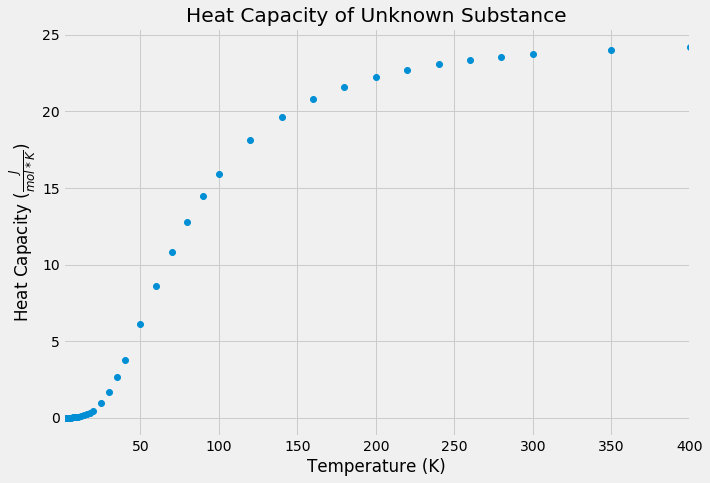

In [3]:
data.plot(x='temp', y='cv', title='Heat Capacity of Unknown Substance', legend=False, style='o', figsize=(10, 7))
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity ($\\frac{J}{mol * K}$)')

In order to compute the theoretical heat capacity of this substance using the Debye and quantum free electron models, we need to determine two physical constants, the Fermi energy, $E_f$ and the Debye temperature, $\Theta_D$.